# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com](https://www.airlinequality.com) you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways](https://www.airlinequality.com/airline-reviews/british-airways) you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
# # Install the requests module
# !pip install requests

     -------------------------------------- 62.8/62.8 kB 305.7 kB/s eta 0:00:00
     -------------------------------------- 97.1/97.1 kB 504.8 kB/s eta 0:00:00
     ------------------------------------ 140.6/140.6 kB 642.4 kB/s eta 0:00:00


In [1]:
# import requests
# from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 30
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#     print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

,reviews
0,✅ Trip Verified | The incoming and outgoing f...
1,✅ Trip Verified | Back in December my family ...
2,✅ Trip Verified | As usual the flight is dela...
3,✅ Trip Verified | A short BA euro trip and thi...
4,Not Verified | We are flying Business class f...


In [4]:
# df.to_csv("../data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Analysis

We have increased the dataset from 1000 reviews to 3000 reviews in order to improve the output of our analysis.

### Rule-based approach

This is a practical approach to analyzing text without training or using labels. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are known as lexicons. Hence, the rule Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approach are TextBlob, VADER, SentiWordNet

First let us list out our analysis work flow

1. Data Loading
2. Data Cleaning
3. Sentiment Analysis
4. Frequency Analysis
5. Word Cloud
4. Topic Modeling

We have scrapped and loaded the data, now lets get to cleaning the data

### 1. Data Loading

In [87]:
import pandas as pd
df = pd.read_csv("../data/BA_reviews.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

In [88]:
df

,reviews
0,✅ Trip Verified | The incoming and outgoing flight was delayed because French Air Traffic Contr...
1,✅ Trip Verified | Back in December my family and I as we were getting onto the plane were refus...
2,"✅ Trip Verified | As usual the flight is delayed this week, it already 3 hours and I’m held on ..."
3,"✅ Trip Verified | A short BA euro trip and this is where BA excel. Clean aircraft, good crew, pr..."
4,Not Verified | We are flying Business class for most of our flight and then Premium economy for...
...,...
2995,LHR-SFO-LHR. Why do I keep thinking BA will improve? The 747 on this route is falling to bits. T...
2996,Muscat - Abu Dhabi - London. Delayed over two hours no vouchers offered. No welcome drinks or pa...
2997,The last trip was in Nov to Washington flew first in the new A380 which is a great aircraft very...
2998,We flew from Manchester to LHR to YCC and return over the Christmas period on the Dreamliner. Th...


### 2. Data Cleaning

In [89]:
# Import labraries for test data cleaning
import pandas as pd 
import re 
import string 
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words("english")
wn = nltk.WordNetLemmatizer()
punct = string.punctuation

First we remove the parts before the `|` sign. For example  "✅ Trip Verified" appears before the `|` and it is unnecessary to the customer review.

In [90]:
def split_review(text):
    if '|' in text:
        text = text.split('|')[1]
    else:
        pass
    return text

In [92]:
df["reviews"] = df["reviews"].apply(split_review)
df

,reviews
0,The incoming and outgoing flight was delayed because French Air Traffic Controllers were on st...
1,Back in December my family and I as we were getting onto the plane were refused. Even though w...
2,"As usual the flight is delayed this week, it already 3 hours and I’m held on a bus waiting to ..."
3,"A short BA euro trip and this is where BA excel. Clean aircraft, good crew, professional, on ti..."
4,We are flying Business class for most of our flight and then Premium economy for the balance. ...
...,...
2995,LHR-SFO-LHR. Why do I keep thinking BA will improve? The 747 on this route is falling to bits. T...
2996,Muscat - Abu Dhabi - London. Delayed over two hours no vouchers offered. No welcome drinks or pa...
2997,The last trip was in Nov to Washington flew first in the new A380 which is a great aircraft very...
2998,We flew from Manchester to LHR to YCC and return over the Christmas period on the Dreamliner. Th...


### Clean text

In [108]:
# This function cleans the data

def clean_text(text):
    # Remove punctuations 
    text = "".join([word.lower() for word in text if word not in punct])
    
    # Remove any other signs
    text = " ".join(re.split('\W+', text))
    
    # Remove numerial leaving only aplabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    
    text = text.split()
    
    # Remove stopwords
    text = [word for word in text if word not in stopwords]
    
    # lemmatize
    text = [wn.lemmatize(word) for word in text]
    
    #
    text = " ".join([word for word in text])
    
    return text

df["cleaned_reviews"] = df["reviews"]. apply(clean_text)
df.sample(10)

,reviews,cleaned_reviews
2927,Flew from LHR to CAI new years day business class - was absolutely superb. Cabin staff were atte...,flew lhr cai new year day business class absolutely superb cabin staff attentive helpful flight ...
2072,"London Heathrow to Seoul Incheon with British Airways. Good service from FAs, and a high quali...",london heathrow seoul incheon british airway good service fa high quality screen ife shame other...
2892,I flew from LHR to SIN; the aircraft was a Boeing 747-400 which was tired and old. The IFE had t...,flew lhr sin aircraft boeing tired old ife rebooted system yet date like ba aircraft seating cov...
1355,"London Heathrow to Barcelona. I thought it would be better than a low cost airline, but it is ...",london heathrow barcelona thought would better low cost airline fact quite worse cheaper option ...
2610,I am a regular user of BA and generally find the airline to be OK but not outstanding. This flig...,regular user ba generally find airline ok outstanding flight fairly full departed time check qui...
2433,"Booked through Iberia a year before departure with the addition of a connection to Las Palmas, o...",booked iberia year departure addition connection la palmas online check completed hour advance n...
2894,I took a flight from Gatwick to Barcelona. Although it had a BA flight number it was operated by...,took flight gatwick barcelona although ba flight number operated vueling meant couldnt use ba lo...
469,London Heathrow to Miami. Flying the Boeing 747-400. Unfortunately BA hasn't done much work on...,london heathrow miami flying boeing unfortunately ba hasnt done much work first class aircraft s...
1751,Absolute disgrace. They cancelled my flight 1 hour and 45 minutes before the the flight and pu...,absolute disgrace cancelled flight hour minute flight put next flight hour minute delay vip acce...
1708,Baltimore Washington to London Heathrow. Bad start for my first trip on British Airways. Extra...,baltimore washington london heathrow bad start first trip british airway extra cost decent seat ...


### 3.  Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative, it also tells the intensity of the emotion.

In [110]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 296.7 kB/s eta 0:00:00


In [118]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# this function calculates the vader sentiment
def sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score["compound"]

df["sentiment_score"] = df["cleaned_reviews"].apply(sentiment_score)
df.head()       

,reviews,cleaned_reviews,sentiment_score
0,The incoming and outgoing flight was delayed because French Air Traffic Controllers were on st...,incoming outgoing flight delayed french air traffic controller strike routed germany ba fault ar...,-0.9228
1,Back in December my family and I as we were getting onto the plane were refused. Even though w...,back december family getting onto plane refused even though boarding pass seat allocated booked ...,0.1749
2,"As usual the flight is delayed this week, it already 3 hours and I’m held on a bus waiting to ...",usual flight delayed week already hour held bus waiting get taken plane really explain much dete...,0.1779
3,"A short BA euro trip and this is where BA excel. Clean aircraft, good crew, professional, on ti...",short ba euro trip ba excel clean aircraft good crew professional time within lhr standard good ...,0.9753
4,We are flying Business class for most of our flight and then Premium economy for the balance. ...,flying business class flight premium economy balance addition plane ticket paid additional pp se...,-0.4412


In [119]:
# classify the sentiment as positive, negative, or neutral

# function to analys the sentiment 
def sentiment_analysis(score):
    if score < -0.05:
        return "Negative"
    elif score > 0.35:
        return "Positive"
    else:
        return "Neutral"

df["sentiment"] = df["sentiment_score"].apply(sentiment_analysis)
df.head()

,reviews,cleaned_reviews,sentiment_score,sentiment
0,The incoming and outgoing flight was delayed because French Air Traffic Controllers were on st...,incoming outgoing flight delayed french air traffic controller strike routed germany ba fault ar...,-0.9228,Negative
1,Back in December my family and I as we were getting onto the plane were refused. Even though w...,back december family getting onto plane refused even though boarding pass seat allocated booked ...,0.1749,Neutral
2,"As usual the flight is delayed this week, it already 3 hours and I’m held on a bus waiting to ...",usual flight delayed week already hour held bus waiting get taken plane really explain much dete...,0.1779,Neutral
3,"A short BA euro trip and this is where BA excel. Clean aircraft, good crew, professional, on ti...",short ba euro trip ba excel clean aircraft good crew professional time within lhr standard good ...,0.9753,Positive
4,We are flying Business class for most of our flight and then Premium economy for the balance. ...,flying business class flight premium economy balance addition plane ticket paid additional pp se...,-0.4412,Negative


In [125]:
# View sentiment value counts
df["sentiment"].value_counts()

Positive    1795
Negative     975
Neutral      230
Name: sentiment, dtype: int64

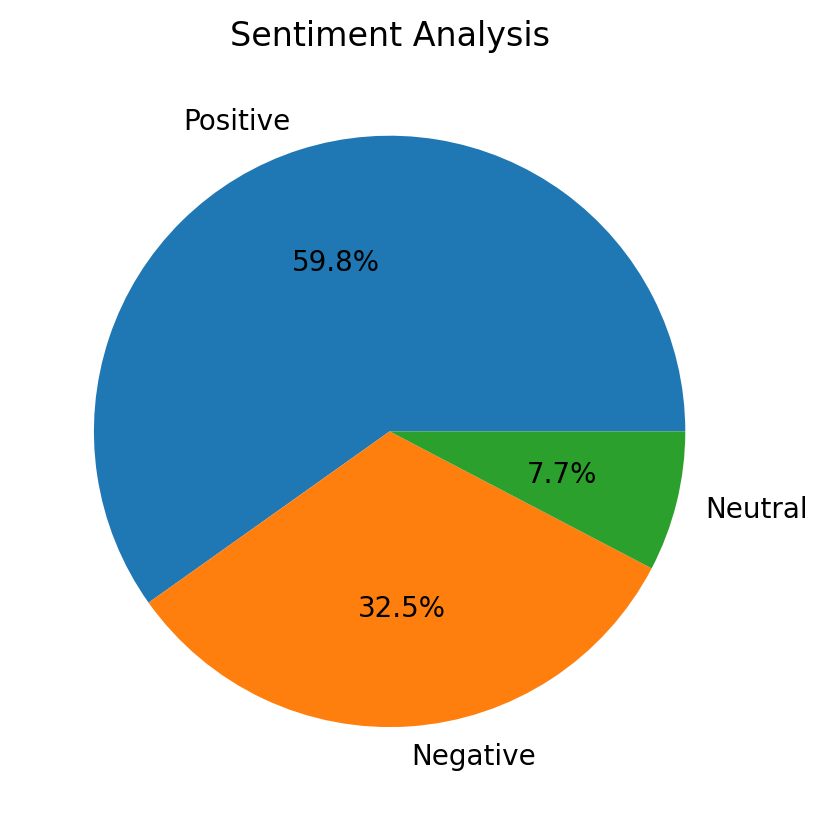

In [130]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)



plt.title("Sentiment Analysis")
plt.pie(df["sentiment"].value_counts(), 
        labels = df["sentiment"].value_counts().index, 
        autopct='%1.1f%%', shadow=False)
plt.show()

### 4 Frequency Analysis

Let's view the frequency of words in both the positive and negative sentiments

In [146]:
# get all the words in the cleaned_reviews
all_words = df['cleaned_reviews'].str.split(expand=True).unstack().value_counts()
all_words

flight           6336
ba               3995
seat             3658
service          2422
london           1968
                 ... 
luminescent         1
modestly            1
londongatwick       1
wate                1
simplistic          1
Length: 11541, dtype: int64

In [149]:
#frequency of all positive reviews
positive_df = df[df["sentiment"] == "Positive"]
positive_words = positive_df['cleaned_reviews'].str.split(expand=True).unstack().value_counts()
positive_words

flight     3731
ba         2329
seat       2316
service    1509
good       1411
           ... 
existed       1
noir          1
desing        1
warmed        1
demise        1
Length: 9171, dtype: int64

In [156]:
negative_df = df[df["sentiment"] == "Negative"]
negative_words = negative_df['cleaned_reviews'].str.split(expand=True).unstack().value_counts()
negative_words

flight         2174
ba             1416
seat           1111
service         752
british         718
               ... 
lonely            1
flock             1
fortunate         1
entirely          1
awkwardness       1
Length: 6959, dtype: int64

In [158]:
top_20_words = all_words[:20]
top_20_words

flight      6336
ba          3995
seat        3658
service     2422
london      1968
airway      1953
time        1951
british     1950
food        1909
crew        1786
cabin       1680
good        1640
class       1591
hour        1519
airline     1494
one         1377
heathrow    1319
business    1307
staff       1300
would       1251
dtype: int64

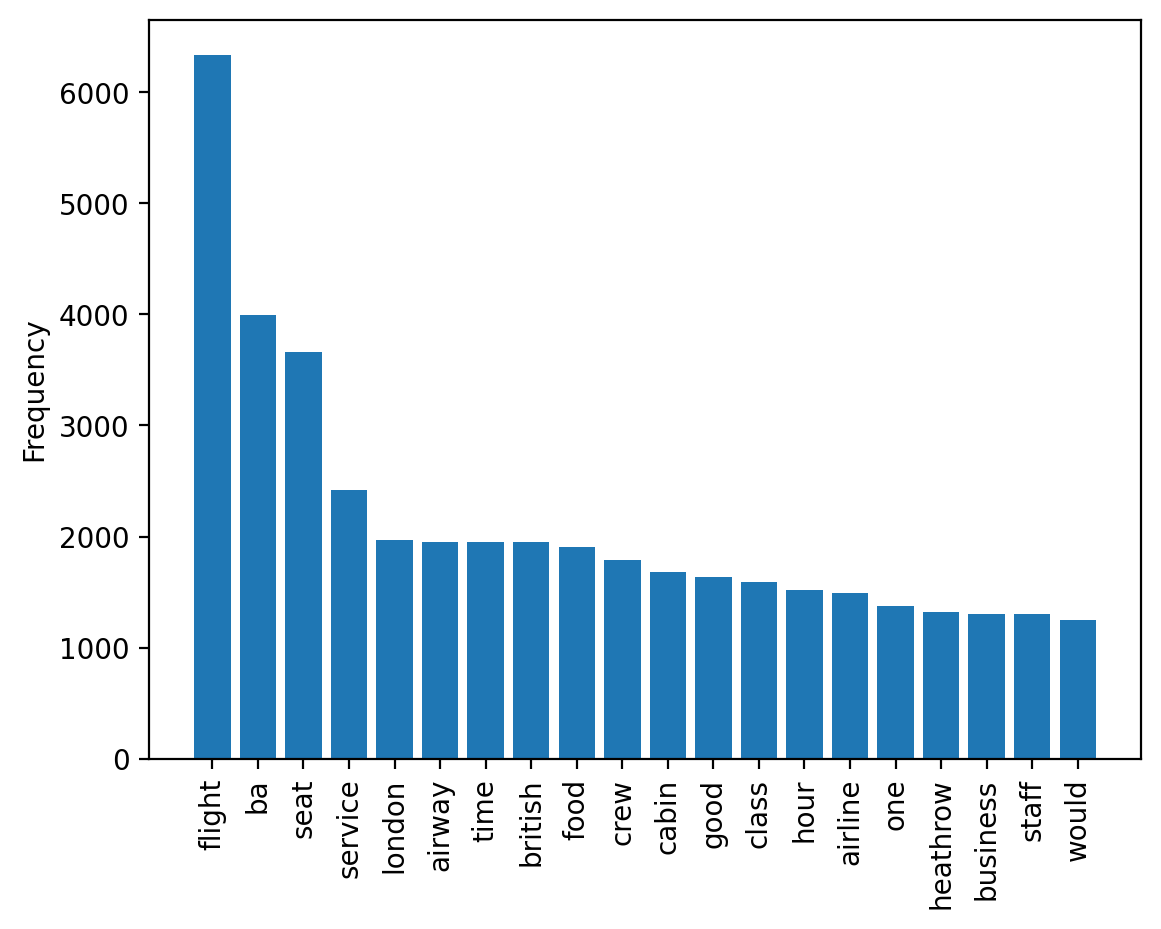

In [161]:
# Plot frequncry of all words
plt.figure(dpi=200)
plt.bar(x=top_20_words.index, height=top_20_words.values)
plt.ylabel("Frequency") 
plt.xticks(rotation=90);

**Alternatively**

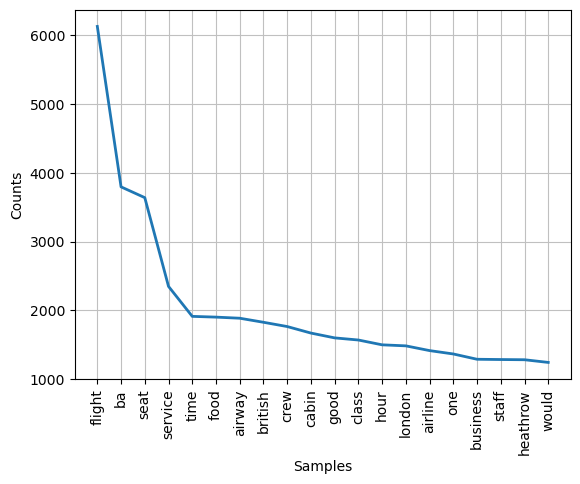

In [183]:
# join all the reviews together

reviews = "".join(df["cleaned_reviews"])
nlp_words = nltk.FreqDist(reviews.split())
nlp_words.plot(20);

### 5. Word Cloud

We will make a word cloud to get a visual representation of the most common words.

In [163]:
! pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 351.8 kB/s eta 0:00:00


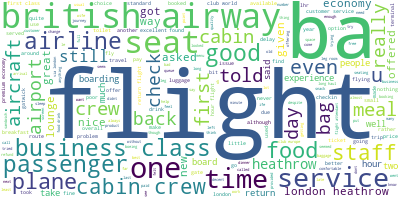

<Figure size 20000x8000 with 0 Axes>

In [196]:
# import wordcloud library
from wordcloud import WordCloud

# Join all the reviews together
reviews = "".join(df["cleaned_reviews"])
reviews

def show_wordcloud(text):
    # Create a WordCloud object
    wordcloud = WordCloud(background_color='white', 
                         max_words=500, contour_width=3,)
    
    # Generate a word cloud
    wordcloud.generate(text)
    
    # Visualize the word cloud
    return wordcloud.to_image();
plt.figure(figsize=(20, 8), dpi=1000)
show_wordcloud(reviews)
